In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

## Question 1 

In [2]:
# Load the perceptron-data file
perceptron_data = pickle.load(open('./data/perceptron-data.pkl','rb'),encoding='latin1')

# Convert pickle dict to pandas dataframe
perceptron_df = pd.DataFrame()
perceptron_df['v0'] = perceptron_data['vectors'][0]
perceptron_df['v1'] = perceptron_data['vectors'][1]
perceptron_df['labels'] = perceptron_data['labels'].astype(np.int)

perceptron_df.head()

,v0,v1,labels
0,-3.967563,0.029670,1
1,3.701603,-0.424998,0
2,-1.391995,-0.693690,1
3,0.764722,0.596842,1
4,-0.442530,3.152025,1


In [81]:
class Perceptron:
    
    def __init__(self, epochs, learning_rate, run_number=1):
        # weights corresponding to [bias, w0, w1]
        self.weights = [0.0, 0.0, 0.0]
        self.epochs = epochs
        self.L = learning_rate
        self.run_number = run_number    # for plotting
        self.labels_correct = [None]*self.epochs
    
    def predict(self, vector):
        #y = (w0 * v0) + (w1 * v1) + bias
        y = (self.weights[1] * vector['v0']) + (self.weights[2] * vector['v1']) + self.weights[0]
        return 1 if y >= 0.0 else 0
    
    def train(self, df, accuracy):
        df['predictions'] = np.nan
        df['correct'] = np.nan
        
        for n in range(self.epochs):
            #print('\n*** epoch:', n+1,'***')
            #print('weights:',self.weights)
            
            for index,V in df.iterrows():
                # print(self.weights)
                # Run the prediction function on each sample
                y = self.predict(V)
                # Update predictions col for each sample
                df.at[index,'predictions'] = y
                
                # Adjust the weights for each new sample
                # dwi = L*vi*(y_desired - y)
                self.weights[0] = self.weights[0] + self.L*(V['labels'] - y)    # bias
                self.weights[1] = self.weights[1] + self.L*V['v0']*(V['labels'] - y)
                self.weights[2] = self.weights[2] + self.L*V['v1']*(V['labels'] - y)
            
            # Count the number of correct predictions for each epoch
            df['correct'] = df.apply(lambda x: x['labels'] == x['predictions'], axis=1)
            self.labels_correct[n] = (df['correct'].sum() / len(df))
        
        # After a full run, add fractions correct to df for plotting
        #print(self.labels_correct)
        accuracy[f'run_{self.run_number}'] = self.labels_correct
            
        print('Final weights:', self.weights)
        return self.weights



In [88]:
epochs = 300
learning_rate = 0.001

# Create dataframe for plotting purposes
accuracy = pd.DataFrame()
accuracy['epoch'] = list(range(1,epochs+1))

for n in range(1,11):
    print('Running iteration',n)
    perceptron = Perceptron(epochs, learning_rate, run_number=n)
    samples = perceptron_df.sample(frac=1).reset_index(drop=True)
    perceptron.train(samples, accuracy)


Running iteration 1
Final weights: [0.0, -0.009518591061228845, 0.0139808435814757]
Running iteration 2
Final weights: [0.0, -0.01666217967267821, 0.023682783330995508]
Running iteration 3
Final weights: [-0.001, -0.024686488305683547, 0.03345629149343752]
Running iteration 4
Final weights: [-0.001, -0.022499652873916927, 0.033151281101149684]
Running iteration 5
Final weights: [-0.001, -0.025269229212293205, 0.031547719882202306]
Running iteration 6
Final weights: [0.001, -0.02510147843687464, 0.03259774685281093]
Running iteration 7
Final weights: [-0.001, -0.015807815964484433, 0.02410245758750176]
Running iteration 8
Final weights: [-0.002, -0.015061740035619638, 0.023592821087829965]
Running iteration 9
Final weights: [-0.001, -0.023129299517932897, 0.031893822738821354]
Running iteration 10
Final weights: [-0.002, -0.017411654930412995, 0.02232406779724348]


In [89]:
accuracy

,epoch,run_1,run_2,run_3,run_4,run_5,run_6,run_7,run_8,run_9,run_10
0,1,0.91,0.94,0.92,0.90,0.93,0.92,0.94,0.92,0.92,0.91
1,2,0.98,0.95,0.96,0.97,0.96,0.93,0.92,0.95,0.96,0.96
2,3,0.95,0.97,0.98,0.96,0.96,0.98,0.98,0.97,0.96,0.96
3,4,0.96,0.97,0.97,0.94,0.97,0.98,0.96,0.98,0.95,0.99
4,5,0.96,0.95,0.94,0.96,0.98,0.96,0.94,0.94,0.98,0.98
...,...,...,...,...,...,...,...,...,...,...,...
295,296,0.98,0.99,0.98,0.98,0.98,0.98,0.98,0.99,0.99,0.98
296,297,0.98,0.97,0.98,0.98,0.98,0.98,0.97,0.97,0.97,0.99
297,298,0.98,0.98,0.98,0.98,0.98,0.98,0.99,0.99,0.99,0.98
298,299,0.98,0.97,0.98,0.98,0.98,0.98,0.97,0.97,0.97,0.98


<Figure size 432x288 with 0 Axes>

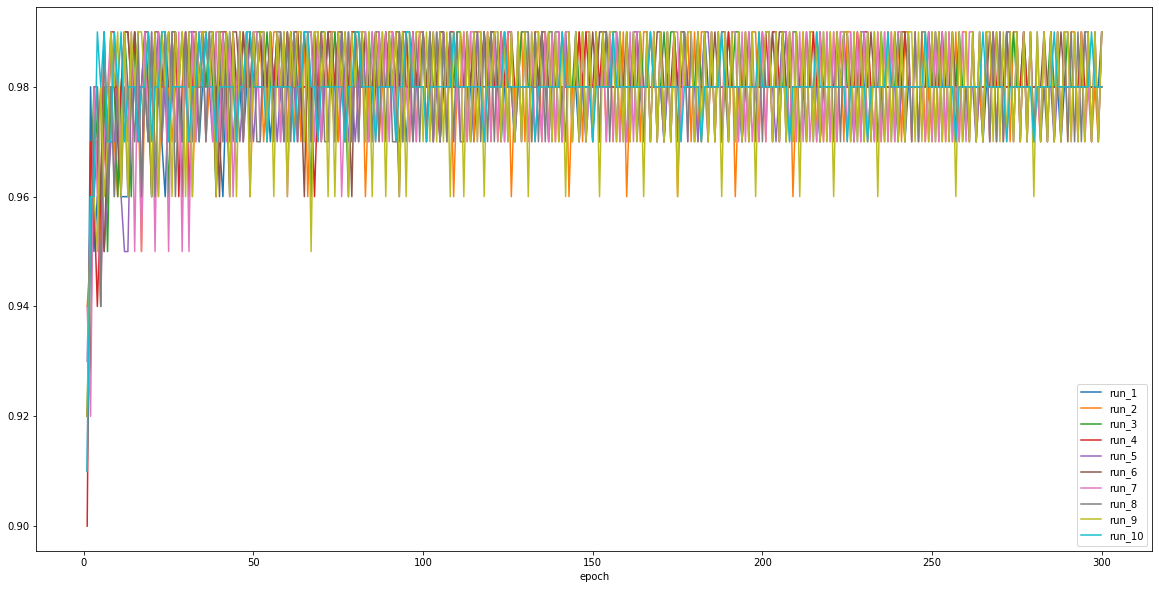

In [93]:
plt.figure()
accuracy.plot(x='epoch',y=['run_1','run_2','run_3','run_4','run_5',
                          'run_6','run_7','run_8','run_9','run_10'],figsize=(20,10))

## Question 2

In [70]:
# Load the regression-data file
regression_data = pickle.load(open('./data/regression-data.pkl','rb'),encoding='latin1')

# Separate test and train into 2 dataframes
test_df = pd.DataFrame()
test_df['x'] = regression_data['testx'][0]
test_df['y'] = regression_data['testy'][0]

train_df = pd.DataFrame()
train_df['x'] = regression_data['trainx'][0]
train_df['y'] = regression_data['trainy'][0]

train_df

,x,y
0,-0.992103,0.079115
1,-0.958496,-0.118512
2,-0.823320,0.788832
3,-0.661778,0.934026
4,-0.603874,0.542292
5,-0.550407,0.285987
6,-0.416248,-0.433870
7,-0.002986,-0.014512
8,0.024385,0.199004
9,0.225052,1.092000


## Question 3

In [62]:
# Load the backprop-data file
backprop_data = pickle.load(open('./data/backprop-data.pkl','rb'),encoding='latin1')

# Convert pickle dict to pandas dataframe
backprop_df = pd.DataFrame()
backprop_df['v0'] = backprop_data['vectors'][0]
backprop_df['v1'] = backprop_data['vectors'][1]
backprop_df['labels'] = backprop_data['labels'].astype(np.int)

backprop_df

,v0,v1,labels
0,2.370732,0.114586,1
1,0.227078,4.881249,0
2,0.279069,0.752080,1
3,-0.260257,-0.025993,1
4,0.096724,0.144143,1
...,...,...,...
195,-2.621964,3.955295,0
196,0.637969,-0.366977,1
197,1.061410,0.056378,1
198,5.214607,0.559901,0
